# Object Recognition with Classical Machine Learning methods

## Introduction

In this project, we will be developing an image classification model based on Machine Learning methods. In particular, we will be using an augmented version Fashion MNIST dataset for a binary classification task to recognise between 'Pullover/Coats' (labelled +1 for positive class), and 'Anything Else' (labelled -1 for negative class). Throughout the project, we will be implementing several machine learning models and evaluate them using with the Stratified K-fold cross-validation approach on different performance metrics. We will draw our conclusion by developing an optimal pipeline for future prediction. Finally we will wrap up the project by giving in-depth discussions on potential problems and possible alternatives.

## 0. Pre-requisites

### 0.1 Install Packages

We assume users have already installed NumPy [1], Pandas [2], and Scikit-learn [3] packages. In case Matplotlib [4] has not been not installed yet, we run the following command. We also display all the packages we are using throughout the project to ensure version and package consistency.

In [1]:
!pip install matplotlib

In [2]:
#Here we display the current packages we are using for this project to avoid any ambiguous version inconsistency

!pip freeze

absl-py==0.13.0
anyio==2.2.0
appdirs==1.4.4
appnope==0.1.2
argon2-cffi==20.1.0
astunparse==1.6.3
async-generator==1.10
attrs==21.2.0
Babel==2.9.1
backcall==0.2.0
bleach==3.3.0
cachetools==4.2.2
certifi==2020.12.5
cffi==1.14.5
chardet==4.0.0
click==8.1.3
cycler==0.10.0
decorator==4.4.2
defusedxml==0.7.1
deprecation==2.1.0
distlib==0.3.1
entrypoints==0.3
filelock==3.0.12
flatbuffers==1.12
future==0.18.2
gast==0.4.0
google-auth==1.32.0
google-auth-oauthlib==0.4.4
google-pasta==0.2.0
grpcio==1.34.1
h5py==3.1.0
idna==2.10
ipykernel==5.5.0
ipython==7.21.0
ipython-genutils==0.2.0
jedi==0.18.0
Jinja2==2.11.3
joblib==1.2.0
json5==0.9.5
jsonschema==3.2.0
jupyter-client==6.1.11
jupyter-core==4.7.1
jupyter-packaging==0.10.1
jupyter-server==1.6.4
jupyterlab==3.0.14
jupyterlab-pygments==0.1.2
jupyterlab-server==2.5.0
keras-nightly==2.5.0.dev2021032900
Keras-Preprocessing==1.1.2
kiwisolver==1.3.1
Markdown==3.3.4
MarkupSafe==1.1.1
matplotlib==3.4.2
mistune==0.8.4
nbclassic==0.2.7
nbclient==0.5.3
nbcon

### 0.2 Import libraries 

We will be using the following libraries in the project. We set the seed to 42 to control the randomness and reproduce same results.

In [3]:
import os  
import pandas as pd
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)

### 0.3 Load CSV files

We then load the three csv files required in our project to the program.

In [4]:
#Ensure that we are in the right directory

os.getcwd()

'/Users/tonykwok730/Desktop/A1'

In [5]:
#Ensure that the required csv files are in our directory

os.listdir()

['Ytrain.csv',
 'Xtrain.csv',
 'CS909 Assignment 1-Copy1.ipynb',
 'Xtest.csv',
 'readme.md',
 '.ipynb_checkpoints',
 'CS909 Assignment 1.ipynb']

In [6]:
#Load the 3 csv files as pandas dataframes

df_xtrain = pd.read_csv("./Xtrain.csv", sep=' ', header=None)
df_ytrain = pd.read_csv("./Ytrain.csv", sep=' ', header=None)
df_xtest = pd.read_csv("./Xtest.csv", sep=' ', header=None)

## 1. Data Exploration

### 1.1 Sample Size

First off, we observe the number of samples in both the training and the test data and in particular, we examine the number of positive (+1) and negative samples (-1) in our training dataset.

In [7]:
# Shape of the dataframes
print(df_xtrain.shape)
print(df_ytrain.shape)
print(df_xtest.shape)

(3000, 784)
(3000, 1)
(3000, 784)


In [8]:
#Cast the dataframes into numpy arrays 

X_train = df_xtrain.to_numpy()
y_train = df_ytrain.to_numpy().ravel()
X_test = df_xtest.to_numpy()

y_train

array([-1, -1, -1, ..., -1, -1, -1])

In [9]:
#Observe number of examples

print(f"There are totally {X_train.shape[0]} examples in the training set.")
print(f"There are totally {X_test.shape[0]} examples in the test set.")
print(f"There are totally {int(np.sum((y_train) > 0, axis=0))} positive examples in the training set.")
print(f"There are totally {int(np.sum((y_train) < 0, axis=0))} negative examples in the training set.")

There are totally 3000 examples in the training set.
There are totally 3000 examples in the test set.
There are totally 611 positive examples in the training set.
There are totally 2389 negative examples in the training set.


### 1.2 Image Visualization

We reshape some randomly chosen arrays from X_train and X_test into 28 x 28 and plot them with Matplotlib functions. 

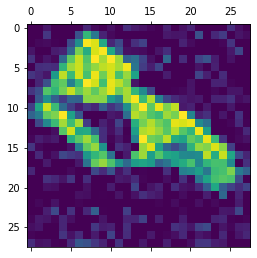

In [10]:
#We first plot one of the training image to ensure everything's ok

plt.matshow(X_train[0].reshape((28, 28)))

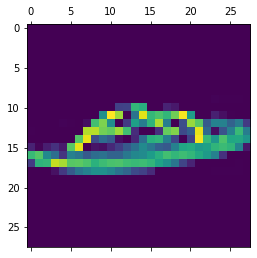

In [11]:
#We do the same for the test data

plt.matshow(X_test[0].reshape((28, 28)))

In [12]:
#Randomly pick 10 numbers as indices for plotting

random_idx = [random.randint(0, X_train.shape[0]) for i in range(10)]
random_idx

[2619, 456, 102, 1126, 1003, 914, 571, 419, 2771, 2233]

The label of the 2620th image is given by -1.
The label of the 457th image is given by 1.
The label of the 103th image is given by -1.
The label of the 1127th image is given by -1.
The label of the 1004th image is given by -1.
The label of the 915th image is given by -1.
The label of the 572th image is given by -1.
The label of the 420th image is given by -1.
The label of the 2772th image is given by 1.
The label of the 2234th image is given by -1.


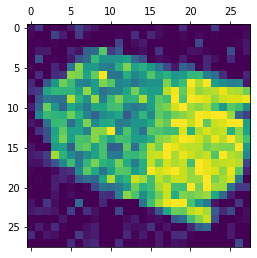

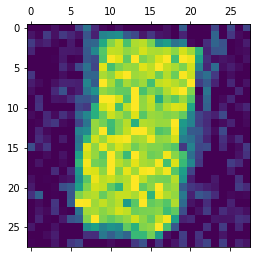

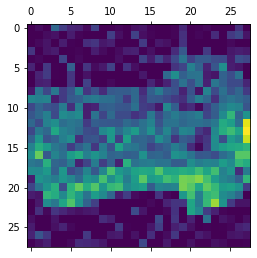

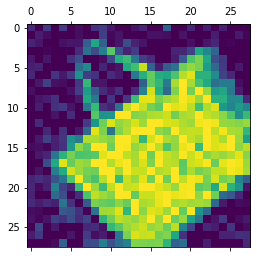

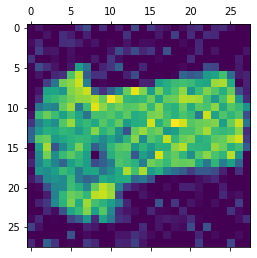

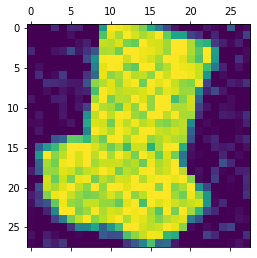

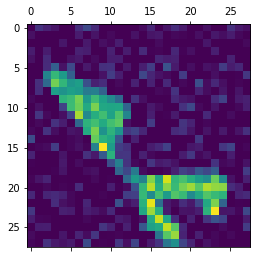

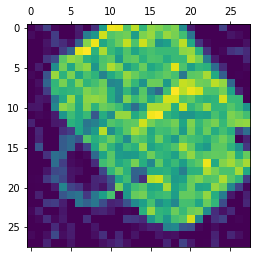

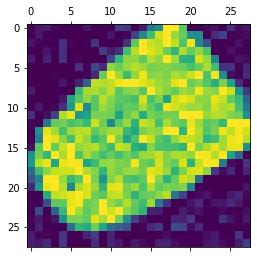

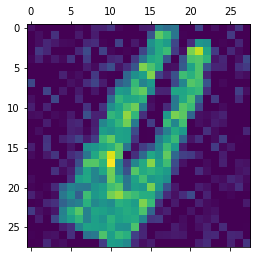

In [13]:
#Plotting the randomly chosen training images (with their corresponding labels)

for i in random_idx:
    plt.matshow(X_train[i].reshape((28, 28)))
    print(f"The label of the {i + 1}th image is given by {y_train[i]}.")
    
#This illustrates that our binary classification problem is about classfying between pullover images and other images

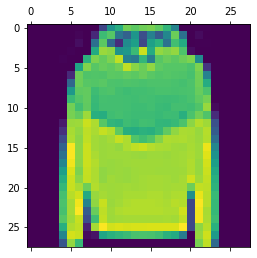

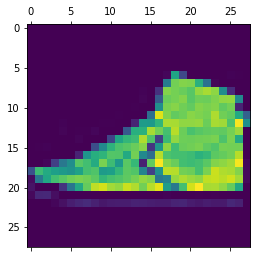

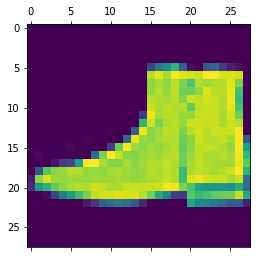

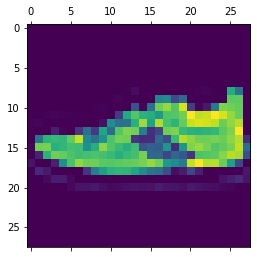

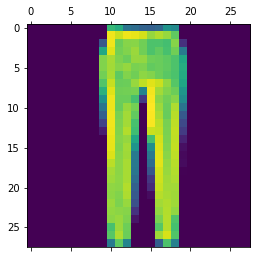

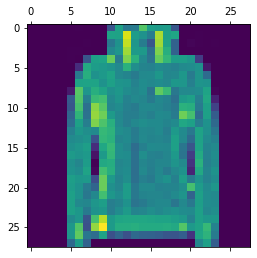

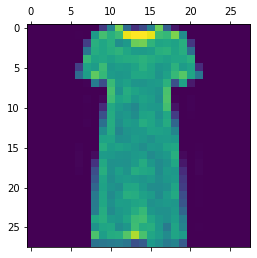

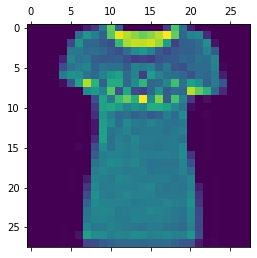

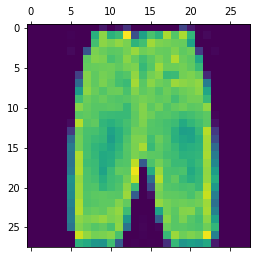

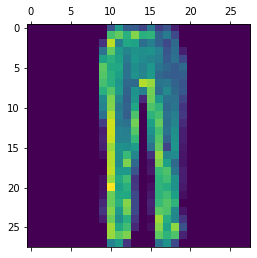

In [14]:
#Plotting the randomly chosen test images
for i in random_idx:
    plt.matshow(X_test[i].reshape((28, 28)))

The visualization looks good but we might want to have our plots more compact to see if there are potential problems. We use imshow() to create subplots to visualize more training and test images

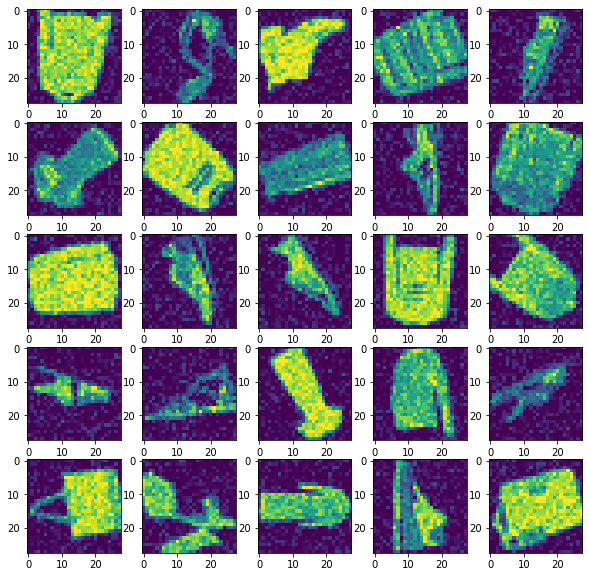

In [15]:
#Subplots with imshow()

def visualize_data(X):
    fig = plt.figure(figsize=(10, 10))

    #We can change the columns and rows here
    columns = 5
    rows = 5

    random_idx_2 = [random.randint(0, X.shape[0]) for i in range(columns*rows)]

    for i in range(1, columns*rows +1):
        img = X[random_idx_2[i-1]].reshape((28, 28))
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)

    plt.show()

visualize_data(X_train)

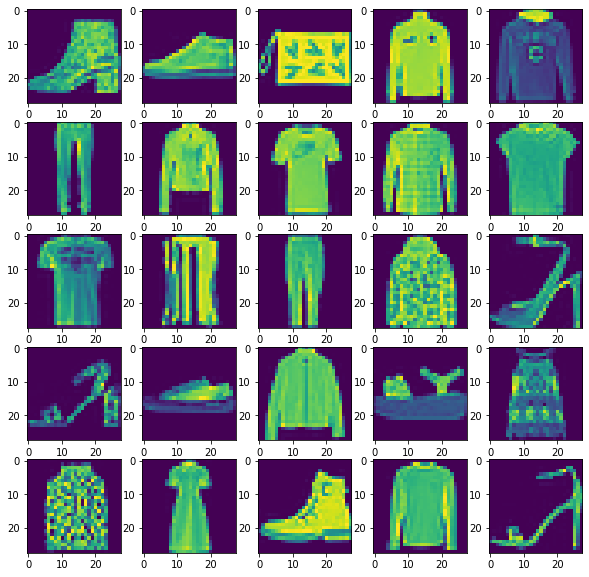

In [16]:
#Same for test data

visualize_data(X_test)

#### Caveat

We observed that the training data is very imbalanced as almost 80% of them belong to negative examples, which might be a threat to our model performance. Therefore we must use straification when we draw samples from data to tackle the problem.

Also, we discovered that the training images are augmented with random noises while the test images are not. Despite it is sometimes believed that adding random noise can help generalise the model better, it is not necessarily the case as it depends on the behaviour of the noise. Adversarial examples [5] is a good example of how noise can drastically affect model performance. Usually, models perform the best when they are trained and tested on data with similar natures but from the visualizations above it seems like the training and test data follow slightly different distributions. Therefore, we must be aware of such a difference between our train and test data.

### 1.3 Performance Metrics

There are several performance metrics available for this kind of binary classification problem, e.g. accuracy, F1-score, Area Under Curve (AUC) of precision-recall (PR) curve, and Area Under Curve (AUC) of Receiver Operator Characteristics (ROC) curve. They are all designed to evaluate model performance from different perspectives, but we believe that not all of them will be appropiate for our project.

Accuracy measures the overall correctness of the model. Since we have about 80% of the data coming from the same (negative) class, the model can be easily trained to achieve a 80% accuracy by simply predicting all the data to belong to the negative class. Hence, with such a heavy data imbalance in our dataset, a high prediction accuracy does not necesscarily implies that the model is well-trained. So, we believe that accuracy is not a suitable metric for our project.

An ROC curve plots True Positive Rate (TPR) against False Positive Rate (FPR). We believe that with imbalanced data, AUC-ROC is not an appropiate metric for performance evaluation either. Consider FPR = FP / (FP + TN) and TPR = Recall = TP / (TP + FN). Since we have a much larger number of negative samples than positive samples in our dataset, it has an innate tendency to achieve a low FPR by the nature of its formula (i.e. in a good model we expect TN >>> TP respectively if N >>> P). 

Also, we note that predicting negative samples is not much of our interests. It is the prediction of the positive class (which happens to be the minority class) that matters the most in our model, as the other classes are consisting only of miscellaneous negative examples. 

Therefore, we believe that AUC-PR would be the best option to evaluate our model performance. We note that the formulas of precision and recall are given by, respectively, Precision = TP / TP + FP and Recall = TP / TP + FN. So, a large AUC-PR would require both our FP and FN to be small enough relative to TP, which is the quantity of our interest. This would enforce our model to make good positive predictions, i.e. able to identify the positive examples.

An alternative would be using F1-score, which is a function and a one-number summary of precision and recall that tackles the problem of imbalanced data. 



### 1.4 Expected Accuracy of a Random Classifier

We argue that the expected accuracy of a completely random binary classifier (i.e. making a blind guess) would be 50% = 0.5, regardless of number of instances of the two data classes. We note that applying random binary classfier on a dataset is essentially equivalent to generating an array random labels '-1' and '1' uniformly with probability 0.5 each. Suppose n% of the data are of the positive class and (100 - n)% of the data are of the negative class. The expected accuracy = 0.5 * n + 0.5 * (1 - n) = 0.5, which does not depend on n.

We now run a tiny computer experiment to futher validate our argument.

In [17]:
#We write a function to evaluate accuracy 

def accuracy(y1, y2):
    correct = 0
    wrong = 0

    for i in range(y1.shape[0]):
        if y1[i] == y2[i]:
            correct += 1
        else:
            wrong += 1
    return correct / (correct + wrong)


#Create an array of random '-1' and '1' of the same size of y_train 
y_random = np.array([-1 if random.uniform(-1, 1) < 0 else 1 for i in range(y_train.shape[0])]).reshape(y_train.shape)    
y_random2 = np.array([-1 if random.uniform(-1, 1) < 0 else 1 for i in range(y_train.shape[0])]).reshape(y_train.shape)    
y_random3 = np.array([-1 if random.uniform(-1, 1) < 0 else 1 for i in range(y_train.shape[0])]).reshape(y_train.shape)    



#Evaluate the accuracy
print(f"The accuracy of a random binary classifier applied on our training data is given by {accuracy(y_train, y_random) * 100:.{4}}%.")
print(f"The accuracy of another random binary classifier applied on our training data is given by {accuracy(y_train, y_random2) * 100:.{4}}%.")
print(f"The accuracy of the last random binary classifier applied on our training data is given by {accuracy(y_train, y_random3) * 100:.{4}}%.")

The accuracy of a random binary classifier applied on our training data is given by 49.83%.
The accuracy of another random binary classifier applied on our training data is given by 49.1%.
The accuracy of the last random binary classifier applied on our training data is given by 51.73%.


As expected, all the resulting accuracies are very close to 50% which is consistent with our argument above.

### 1.5 AUC-ROC and AUC-PR of a Random Classifier

We argue that for a random classifier, the expected AUC-ROC would be 0.5 and the expected AUC-PR would be the proportion of positive examples, which is ~0.2 in our case. We write down a simple mathematical proof of our claims. Note that the AUC-ROC is the expectation, of TPR = TP / (TP + FN) over different FPR = FP / (TN + FP) values, and the AUC-PR is, on the other hand, an expectation of Precision = TP / (TP + FP) over different Recall = TP / (TP + FN) values. 

Suppose the total number of data = n, and 20% of them are of positive class. Suppose our random classifier is uniform with p = 0.5 predicting a positive class and p = 0.5 predicting a negative class, regardless of their true class. Here we note that the prediction of a random classifier is independent of the real labels, i.e. equivalent to a blind guess.

Hence, by independence of predicted and real labels,

Expected AUC-ROC = P(TP | P) = P(Predicted P)P(True P) / P(True P) = P(Predicted P) = 0.5 

Expected AUC-PR = P(TP | Predicted P) = P(Predicted P)P(True P) / P(Predicted P) = P(True P) = 0.2



The AUC-PU (a.k.a. average precision score) of the Random Classifier is given by 0.2017.
The AUC-ROC of the Random Classifier is given by 0.4938.


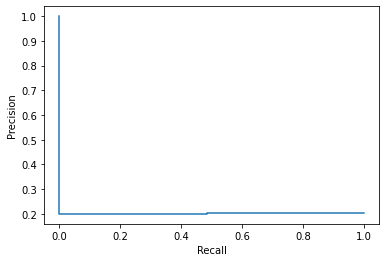

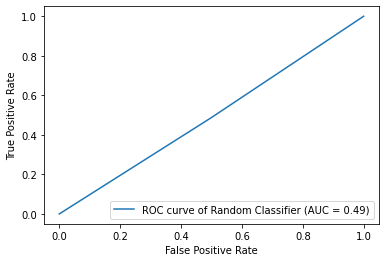

In [18]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, roc_curve, RocCurveDisplay, auc, average_precision_score

precision, recall, _ = precision_recall_curve(y_train, y_random)
fpr, tpr, _ = roc_curve(y_train, y_random)

roc_auc = auc(fpr, tpr)

display = PrecisionRecallDisplay(precision=precision, recall=recall)
display2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve of Random Classifier')


display.plot()
display2.plot()

print(f"The AUC-PU (a.k.a. average precision score) of the Random Classifier is given by {average_precision_score(y_train, y_random):.{4}}.")
print(f"The AUC-ROC of the Random Classifier is given by {auc(fpr, tpr):.{4}}.")

As we see, the results of computer experiment once again agrees with our theoretical result.

## 2. KNN Classifier

### 2.1 Stratified K-fold Cross Validation

We now train our initial model on a KNN Classfier (with k = 3) on the train dataset with stratified K-fold cross-validation (with K = 5) to evaluate our results. The reason why we need stratification is because of the class imbalance problem we mentioned above, so we wish to keep the relative percentage of each class in each of the folds. We will be using accuracy, balanced accuracy, AUC-ROC and AUC-PR as performance metrics in our model evaluation. We print the precision and the recall here as well for the ease of making analysis.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import ConfusionMatrixDisplay


skfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

clf = KNeighborsClassifier(n_neighbors=3)

#Note that 'average_precision' is essentially the AUC-PR estimated with numerical integration
metrics = ['accuracy', 'balanced_accuracy', 'average_precision', 'roc_auc', 'precision', 'recall']


def evaluate_model(X_train, y_train, metrics, skfold, pipeline):
    
    CV = cross_validate(pipeline, X_train, y_train, scoring=metrics, cv=skfold)

    for metric in metrics:
        print(f"Mean of {metric}: {np.mean(CV['test_' + metric]):.{4}};\nSD of {metric}: {np.std(CV['test_' + metric]):.{4}}")
        
evaluate_model(X_train, y_train, metrics, skfold, clf)

Mean of accuracy: 0.8693;
SD of accuracy: 0.009165
Mean of balanced_accuracy: 0.795;
SD of balanced_accuracy: 0.01344
Mean of average_precision: 0.6441;
SD of average_precision: 0.04299
Mean of roc_auc: 0.883;
SD of roc_auc: 0.01456
Mean of precision: 0.6834;
SD of precision: 0.02589
Mean of recall: 0.6695;
SD of recall: 0.02407


Here, we present our outputs in a table below

|                      | Mean        | Standard deviation |
| -----------          | :---------: | :---------:        |
| Accuracy             | 0.8680      |  0.011787          |
| Balanaced Accuracy   | 0.7861      |  0.018623          |
| AUC-PR               | 0.6258      |  0.046374          |
| AUC-ROC              | 0.8744      |  0.026098          |


### 2.2 Plots and further investigation 

We observed that despite that we obtained a fairly high accuracy, the balanced accuracy, which is an average of sensitivity and specificity, is significantly lower. Also, the AUC-PR is rather low compared to the other metrics. We suspect that it is due to the class imbalance of our data. To make further investigation, we present the confusion matrix, ROC curve and the PR curve of one of the folds in our cross-validation.

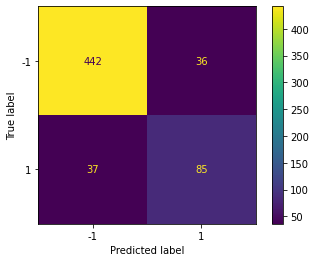

In [20]:
#Confusion matrix for investigation

def plot_confusion(X_train, y_train):
    for _, (train, test) in enumerate(skfold.split(X_train, y_train)):
        clf.fit(X_train[train], y_train[train])
        ConfusionMatrixDisplay.from_estimator(clf, X_train[test], y_train[test])
        break

plot_confusion(X_train, y_train)      

### Observations

As we see, despite the model accurately predicted most of the true negative examples, both the precision and the recall is relatively low. A reasonable explanation of this phenomenon is that the class imbalance 'encourages' our model to make negative predictions when the training is based on accuracies. Also, it is also possible that we actually don't have enough positive samples to train our model.

For a simple illustration, a model that predicts every example to be of negative class can easily obtain an 80% accuracy due to the disproportionate negative samples in the data. 

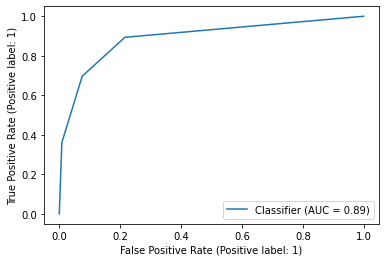

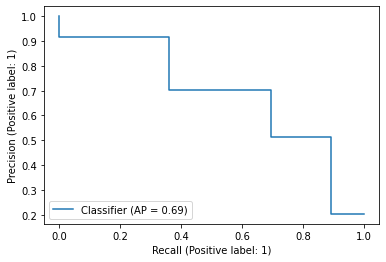

In [21]:
#ROC curve and PR curve

def plotROCPR(X_train, y_train):
    for _, (train, test) in enumerate(skfold.split(X_train, y_train)):
        proba = clf.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
        RocCurveDisplay.from_predictions(y_train[test], proba[:, 1])
        PrecisionRecallDisplay.from_predictions(y_train[test], proba[:, 1])
    #     My original attempt without using predict_proba, gives the same result
    #     clf.fit(X_train[train], y_train[train])
    #     RocCurveDisplay.from_estimator(clf, X_train[test], y_train[test])
    #     PrecisionRecallDisplay.from_estimator(clf, X_train[test], y_train[test])
        break
        
plotROCPR(X_train, y_train)

### Conclusion: high accuracy does not imply good model performance

Again, we wee that the ROC curve gives a much larger AUC than the PR curve does. This further validates our belief that the model attained a high accuracy mainly by giving True Negative Predictions, which is not too much of our interests. Yet its performance on the positive class, based on metrics like precision and recall, is very mediocre. Apparently, we need to improve our model.

### 2.3 Impact of Preprocessing

As a first step to improve our model, we first make an attempt on data preprocessing and investigate how it impacts our validation results. In this subsection we will look at how three different data preprocessing techniques impact our model performance. In particular, Standardization transforms each sample to Standard Normal Distribution, Min-Max Scaling scales down feature values to the range of [0,1], and Normalization scales down each vector to have norm 1.

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline

standard_pipe = Pipeline([('standardization', StandardScaler()), ('3-NN', clf)])
minmax_pipe = Pipeline([('min_max_normalization', MinMaxScaler()), ('3-NN', clf)])
# normal_pipe = Pipeline([('vector_normalization', Normalizer()), ('3-NN', clf)])
# mix_pipe = Pipeline([('vector_normalization', Normalizer()), ('standardization', StandardScaler()), ('3-NN', clf)])

print("KNN with Standardization:")
evaluate_model(X_train, y_train, metrics, skfold, standard_pipe)
print("\nKNN with Min-max Scaling:")
evaluate_model(X_train, y_train, metrics, skfold, minmax_pipe)

KNN with Standardization:
Mean of accuracy: 0.8737;
SD of accuracy: 0.00718
Mean of balanced_accuracy: 0.7989;
SD of balanced_accuracy: 0.01513
Mean of average_precision: 0.6411;
SD of average_precision: 0.02545
Mean of roc_auc: 0.8779;
SD of roc_auc: 0.006422
Mean of precision: 0.6973;
SD of precision: 0.02107
Mean of recall: 0.6727;
SD of recall: 0.03279

KNN with Min-max Scaling:
Mean of accuracy: 0.8687;
SD of accuracy: 0.01067
Mean of balanced_accuracy: 0.7939;
SD of balanced_accuracy: 0.01354
Mean of average_precision: 0.6466;
SD of average_precision: 0.03842
Mean of roc_auc: 0.8854;
SD of roc_auc: 0.01061
Mean of precision: 0.6825;
SD of precision: 0.0331
Mean of recall: 0.6678;
SD of recall: 0.02411


### Observation

We saw that both Min-Max Scaling and Standardization slightly improves our results, but (surprisingly) it is the Unit Vector Normalization that gives the biggest improvement in our model performance. In particular, it significantly improved the recall by almost 15% and the balanced accuracy by 5%. 

It is widely believed that feature-sclaing methods like standardization and min-max scaling usually improves model performance of KNN, but it is not immediately obvious why in our case, the unit vector normalization becomes the winner of them. We also attempted applying feature scaling after unit normalization, and it doesn't show improvements compared to using only vector normalization. It is fascinating to investigate why unit normalization plays such a big role in improving model performance.

## 3. Cross Validation and Model Selection

In this section, we train our data using 4 different model architectures, namely, 1) Perceptron, 2) Gaussian Naive Bayes Classifier, 3) Linear SVM, and 4) Kernel SVM. Similar to what we did above, we will be using a 5-fold cross validation on our training data and evaluate the result using the same performance metrics. For each of the classifiers, we will first apply grid search to do an exhausive search over the hyperparameter space to find the optimal hyperparameters for each classifier based on AUC-PR, i.e.'average_precision'. We then try to observe the effect of adding data preprocessing, and pick the best model from each classifier. Finally, we make comparisons between the classifiers and present our results in a table.

In [23]:
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
def model_cv(parameters, clf, metrics, X_train, y_train):

    clf_cv = GridSearchCV(clf, parameters, scoring='average_precision', cv=skfold, verbose=True)
    clf_cv.fit(X_train, y_train)

    clf_best = clf_cv.best_estimator_
    print(f"The best model given by grid search is {clf_best}")

    print(f"\nModel Performance of {clf_best} under CV:")
    evaluate_model(X_train, y_train, metrics, skfold, clf_best)

### 3.1 Perceptron

For our perceptron models, we apply grid search to search over different regularization constants, alpha, and different penalty norm. We found that the best model is given by setting alpha = 1e-06 and using 'l2' penalty. We then apply 'standardization', 'min-max normalizatio', and 'unit vector normalization' to the best model we have chosen and we see that the model with vector normalization give the best AUC-PR.

In [41]:
#Perceptron

para_grid_perceptron = {'alpha':[0.01, 0.001, 0.0001, 0.00001, 0.000001], 'penalty':['l1', 'l2']}

perceptron = Perceptron(shuffle=True, random_state=42)

metrics = ['accuracy', 'balanced_accuracy', 'average_precision', 'roc_auc', 'precision', 'recall']

model_cv(para_grid_perceptron, perceptron, metrics, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best model given by grid search is Perceptron(penalty='l2', random_state=42)

Model Performance of Perceptron(penalty='l2', random_state=42) under CV:
Mean of accuracy: 0.83;
SD of accuracy: 0.01295
Mean of balanced_accuracy: 0.7331;
SD of balanced_accuracy: 0.03542
Mean of average_precision: 0.5841;
SD of average_precision: 0.04558
Mean of roc_auc: 0.8196;
SD of roc_auc: 0.03781
Mean of precision: 0.5839;
SD of precision: 0.02999
Mean of recall: 0.5697;
SD of recall: 0.07689


### 3.2 Gaussian Naive Bayes Classifier 

There are no hyperparameters to tune for GNB classifier and we note that since the classifier is based on probability, it is invariant to feature scaling (e.g. standardization). So we only compare the vanilla GNB classifier with the one after unit-vector normalization. We discovered that the unit-vector normalization does improve the model performance in terms of AUC-PR, but the overall performance of GNB classifier is poor, possibly because the strong Gaussian likelihood assumption is not applicable to our data.

In [27]:
#GNB Classifier

clf2 = GaussianNB()

metrics = ['accuracy', 'balanced_accuracy', 'average_precision', 'roc_auc', 'precision', 'recall']

print("GNB Classifier CV:")
evaluate_model(X_train, y_train, metrics, skfold, clf2)

GNB Classifier CV:
Mean of accuracy: 0.7553;
SD of accuracy: 0.008459
Mean of balanced_accuracy: 0.7496;
SD of balanced_accuracy: 0.01347
Mean of average_precision: 0.4279;
SD of average_precision: 0.01148
Mean of roc_auc: 0.7804;
SD of roc_auc: 0.01023
Mean of precision: 0.4403;
SD of precision: 0.0108
Mean of recall: 0.7399;
SD of recall: 0.0342


### 3.3 Linear SVM

For our Linear SVM models, we again apply grid search to search for the optimal C, the regularization constant, and  different loss functions. We observed that the best model obtained by the grid search is the one with C=0.125 and using the default squared hinge loss. Similar to Perceptron, we try to investigate the effects of different data preprocessing methods and it turns out the unit-vector normalization improves the model performance the most in terms of AUC-PR.

In [28]:
#Filter the long warnings from Linear SVM
import warnings
warnings.simplefilter("ignore")

In [29]:
para_grid_linearsvm = {'C':[0.125, 0.25, 0.5, 1, 2, 8], 'loss':['hinge', 'squared_hinge']}

linear_svm = LinearSVC(random_state=42, max_iter=3000)

metrics = ['accuracy', 'balanced_accuracy', 'average_precision', 'roc_auc', 'precision', 'recall']

model_cv(para_grid_linearsvm, linear_svm, metrics, X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best model given by grid search is LinearSVC(C=0.125, loss='hinge', max_iter=3000, random_state=42)

Model Performance of LinearSVC(C=0.125, loss='hinge', max_iter=3000, random_state=42) under CV:
Mean of accuracy: 0.8;
SD of accuracy: 0.0152
Mean of balanced_accuracy: 0.7033;
SD of balanced_accuracy: 0.0251
Mean of average_precision: 0.5546;
SD of average_precision: 0.04875
Mean of roc_auc: 0.7938;
SD of roc_auc: 0.02642
Mean of precision: 0.5083;
SD of precision: 0.03435
Mean of recall: 0.5402;
SD of recall: 0.04302


### 3.4 Kernel SVM

Finally for Kernel SVM, we apply grid search to search over different regularization parameters C, the kernel coefficients gamma, and the kernel type. In terms of AUC-PR, the model with 'rbf' kernel, C = 4, and gamma = 'scale' performs the best in our cross-validation. It achieves 75% AUC-PR even before any preprocessing and outperforms any other classifiers in previous subsections. We observed that preprocessing does not significantly improve our results as only standardization gives us a slightly higher AUC-PR.

In [30]:
para_grid_kernelsvm = {'C': [0.125, 0.25, 0.5, 1, 2, 4, 8], 'gamma': ['auto', 'scale'], 'kernel': ['rbf', 'poly']}

kernel_svm = SVC(random_state=42)

metrics = ['accuracy', 'balanced_accuracy', 'average_precision', 'roc_auc', 'precision', 'recall']

model_cv(para_grid_kernelsvm, kernel_svm, metrics, X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
The best model given by grid search is SVC(C=4, random_state=42)

Model Performance of SVC(C=4, random_state=42) under CV:
Mean of accuracy: 0.8807;
SD of accuracy: 0.01319
Mean of balanced_accuracy: 0.7923;
SD of balanced_accuracy: 0.01967
Mean of average_precision: 0.766;
SD of average_precision: 0.0375
Mean of roc_auc: 0.9251;
SD of roc_auc: 0.01284
Mean of precision: 0.7387;
SD of precision: 0.03974
Mean of recall: 0.6432;
SD of recall: 0.03468


### Model Comparison

We now pick the best model from each classifier and make further comparisons between them. The table below illustrates a comparison on these models based on different performance metrics.



In [32]:
#Compare the optimised models of each architecture 

clf1 = Perceptron(penalty='l2', random_state=42)
clf2 = GaussianNB()
clf3 = LinearSVC(C=0.125, loss='hinge', max_iter=3000, random_state=42)
clf4 = SVC(C=4, random_state=42)

metrics_table = ['accuracy', 'balanced_accuracy', 'average_precision', 'roc_auc']

print('Perceptron:')
evaluate_model(X_train, y_train, metrics_table, skfold, clf1)
print('\nGNB Classifier:')
evaluate_model(X_train, y_train, metrics_table, skfold, clf2)
print('\nLinear SVM:')
evaluate_model(X_train, y_train, metrics_table, skfold, clf3)
print('\nKernel SVM:')
evaluate_model(X_train, y_train, metrics_table, skfold, clf4)

Perceptron:
Mean of accuracy: 0.83;
SD of accuracy: 0.01295
Mean of balanced_accuracy: 0.7331;
SD of balanced_accuracy: 0.03542
Mean of average_precision: 0.5841;
SD of average_precision: 0.04558
Mean of roc_auc: 0.8196;
SD of roc_auc: 0.03781

GNB Classifier:
Mean of accuracy: 0.7553;
SD of accuracy: 0.008459
Mean of balanced_accuracy: 0.7496;
SD of balanced_accuracy: 0.01347
Mean of average_precision: 0.4279;
SD of average_precision: 0.01148
Mean of roc_auc: 0.7804;
SD of roc_auc: 0.01023

Linear SVM:
Mean of accuracy: 0.8;
SD of accuracy: 0.0152
Mean of balanced_accuracy: 0.7033;
SD of balanced_accuracy: 0.0251
Mean of average_precision: 0.5546;
SD of average_precision: 0.04875
Mean of roc_auc: 0.7938;
SD of roc_auc: 0.02642

Kernel SVM:
Mean of accuracy: 0.8807;
SD of accuracy: 0.01319
Mean of balanced_accuracy: 0.7923;
SD of balanced_accuracy: 0.01967
Mean of average_precision: 0.766;
SD of average_precision: 0.0375
Mean of roc_auc: 0.9251;
SD of roc_auc: 0.01284


|                      | Perceptron Mean  | GNB Mean   | Linear SVM Mean | Kernel SVM Mean 
| -----------          | :---------:      | :---------:|  :---------:    |   :---------:
| Accuracy             | 0.8497           |  0.7890    |   0.8570        |    0.8807
| Balanaced Accuracy   | 0.7332           |  0.8042    |   0.7050        |    0.7923
| AUC-PR               | 0.6646           |  0.5073    |   0.7133        |    0.7658
| AUC-ROC              | 0.8829           |  0.8534    |   0.9092        |    0.9251

|                      | Perceptron SD  | GNB SD   | Linear SVM SD | Kernel SVM SD 
| -----------          | :---------:      | :---------:|  :---------:    |   :---------:
| Accuracy             | 0.02026           |  0.009463   |   0.01227       |    0.01319
| Balanaced Accuracy   | 0.08304           |  0.008735    |   0.02221        |  0.01967
| AUC-PR               | 0.03207           |  0.004627    |   0.04195       |    0.03717
| AUC-ROC              | 0.01770           |  0.009116   |   0.01521        |    0.01273

### ROC Curves 

We now plot the ROC curves of one of the 5 folds of all the classifiers on the same axes to make comparison.

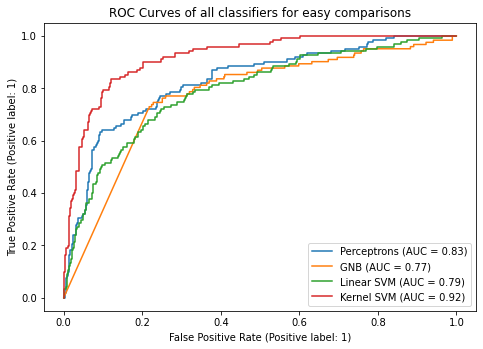

In [33]:
all_clf = [clf1, clf2, clf3, clf4]

def plot_all_ROC(X_train, y_train):
    fig = plt.figure()
    axes = fig.add_axes([1, 1, 1, 1])
    labels = {'1':'Perceptrons', '2':'GNB', '3':'Linear SVM', '4':'Kernel SVM'}
    for _, (train, test) in enumerate(skfold.split(X_train, y_train)):
        i = 1  #labels for legend
        for clf in all_clf:
            clf.fit(X_train[train], y_train[train])
            RocCurveDisplay.from_estimator(clf, X_train[test], y_train[test], name=labels[str(i)], ax=axes)
            i += 1
        break
    plt.title("ROC Curves of all classifiers for easy comparisons")
    
plot_all_ROC(X_train, y_train)

### PR Curves 

We do the same for PR curves. Note that AUC-PR is the metric of our interests so more attention should be paid to this plot than the previous one.

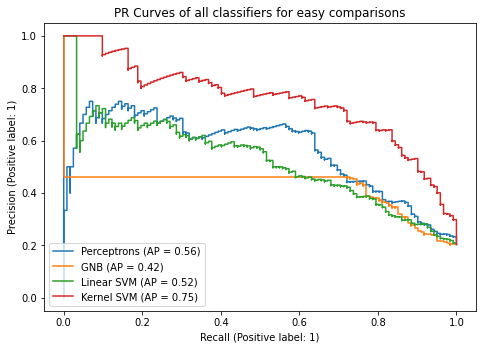

In [34]:
def plot_all_PR(X_train, y_train):
    fig = plt.figure()
    axes = fig.add_axes([1, 1, 1, 1])
    labels = {'1':'Perceptrons', '2':'GNB', '3':'Linear SVM', '4':'Kernel SVM'}
    for _, (train, test) in enumerate(skfold.split(X_train, y_train)):
        i = 1  #labels for legend
        for clf in all_clf:
            clf.fit(X_train[train], y_train[train])
            PrecisionRecallDisplay.from_estimator(clf, X_train[test], y_train[test], name=labels[str(i)], ax=axes)
            i += 1
        break
    plt.title("PR Curves of all classifiers for easy comparisons")
    
plot_all_PR(X_train, y_train)

### Observations

We note that the AUC-ROC of the 4 classifiers are very high, with Kernel SVM giving the best performance (AUC=0.92) and GNB giving the worst (AUC=0.85), but we have to bear in mind that ROC curves has assumptions that data is balanced between the two classes and the two classes are of equal importance, which is not happening in our case. Therefore, high ROC-AUC does not indicate good model performance in our case. Instead, we should consider the metric of AUC-PR (average precision) given by the PR curves below. We saw that the Kernel SVM outperforms all the other classifiers with up to 0.75 AUC-PR/average precision, while the Gaussian NB classifier performed exceptionally poor with only 0.50 AUC-PR. 



### Explanation and Conclusion

We believe that the Kernel SVM outperforms all the other classifiers becuase the 'kernel trick' allows the model to capture non-linear decision boundaries. Perceptron is a model that underperforms when the data are not linearly separable and even SVM with soft margin gives a linear decision boundary. Our training data are essentially flattened vector of high dimensional image data, which is very unlikely to be linearly separable. That is why the kernel SVM gives the best performance. 

Also, we believe that the GNB performs poorly because of the wrong model assumption. In a Bayes Classifier, we make very strong assumption about the likelihood of our data (in our case, normal likelihood). This assumption is too strong for our image data and the GNB model gives a poor fit. 

We conclude that out of the classifiers we tested, Kernel SVM performs the best and we will use it as a default classifier for our tasks in later sections.

## 4. Principal Component Analysis

Principal Component Analysis (PCA) is a common approach to reduce the dimension of our data based on Singular Value Decomposition (SVD). In particular, it exploits the k orthogonal directions that explain the most variance of the data as a low-dimensional representation. It is also useful for visualizing the distributions of high dimensional data. We will first apply PCA to our training data and visualize the training data with a scatter plot to observe any difference between classes. Then we apply PCA on both training and test data to observe the difference in distributions between training and test data. 

After that, we present the scree graph, which depicts the relationship the first principal components and their corresponding proportion of variance exaplined. We make use of the proportion of variance explained to find the number of dimensions required to explain 95% of our data variance. Finally, we apply Kernel SVM on the transformed data and perform cross-validation on certain performance metrics to assess our results.

### Distribution of Training Data between Classes

We plot a figure to display the distribution of the training data points after applying PCA. Each data point of the postive class is represented by a red dot and point of the negative class is represented by a green square. We set alpha = 0.4 for high transperency to observe the overlapping data.

As depicted in the figure below, there are huge overlaps between the data of positive class and the negative class. The negative class does seem to have smaller values in the first PC while the postive class tends to have a larger value in PC1, but we can see that there are plenty of exceptions behaving as noises that make our data nowhere near linearly separable. 

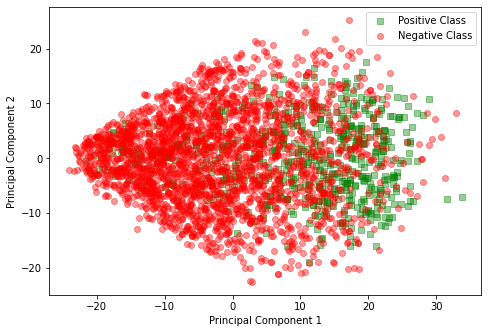

In [35]:
from sklearn.decomposition import PCA

fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

positive_idx = []
negative_idx = []

for i in range(X_train.shape[0]):
    if y_train[i] == 1:
        positive_idx.append(i)
    elif y_train[i] == -1:
        negative_idx.append(i)

axes.scatter(X_train_pca[positive_idx,0], X_train_pca[positive_idx,1], c='g', marker='s', alpha=0.4, label="Positive Class")
axes.scatter(X_train_pca[negative_idx,0], X_train_pca[negative_idx,1], c='r', marker='o', alpha=0.4, label="Negative Class")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()
plt.show()



### Training Data vs Test Data

We do the same to compare the distribution between training data and test data after applying PCA to both. We observed that the two distributions are similar in the first two Principal Components, indicating that they roughly follow the same distribution and are comparable. As we investigated in the previous sections, we know that the training data and the test data differ only in terms of the random noise added to the former. Therefore our PCA visualization is consistent to our expectation based on data investigation.

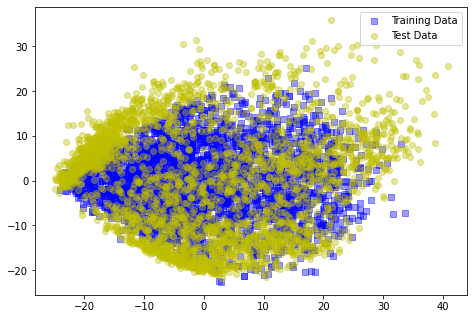

In [36]:
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])

pca2 = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

axes.scatter(X_train_pca[:,0], X_train_pca[:,1], c='b', alpha=0.4, marker='s', label='Training Data')
axes.scatter(X_test_pca[:,0], X_test_pca[:,1], c='y', alpha=0.4, marker='o', label='Test Data')

plt.legend()
plt.show()

### Scree Plot and Proportion of Variance

The PCA scree graph (plot) plots the proportion of variance explained by each PC (in a descending order) against the PCs. We observe that except for the first two PCs which totally explain more than 30% of the data variance, the rest of the PCs explain a relatively small proportion of variance each. This indicates that PCA is not too effective in our case, as we might still need a relatively large number of dimensions (PCs) to explain the amount of information contained in the data.

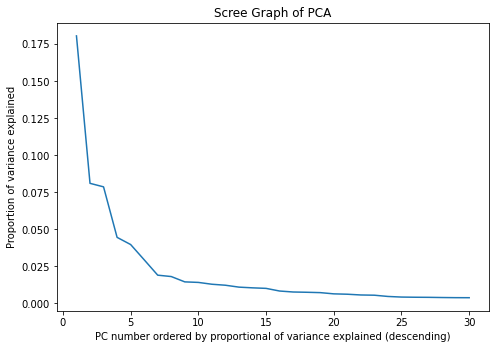

In [37]:
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])

pca3 = PCA()
X_train_pca_all = pca3.fit_transform(X_train)
pc = np.arange(1, 31)

axes.plot(pc, pca3.explained_variance_ratio_[:30])


plt.title('Scree Graph of PCA')
plt.xlabel('PC number ordered by proportional of variance explained (descending)')
plt.ylabel('Proportion of variance explained')
plt.show()


We check the number of dimensions needed to explain 95% of our training data variance, and we show that we need 314 dimensions to achieve that. Despite that the number of dimensions is halved, we argue that it is still of very-high dimensional and does not necessarily help improve our model. This is further validated by the fact that the first two PCs only explain 30% of the variance, which indicates a huge amount of (spatial) information loss after the dimension reduction.

In [38]:
for i in range(X_train.shape[1]):
    if np.sum(pca3.explained_variance_ratio_[:i+1]) >= 0.95:
        print(f"The number of dimensions needed to explain 95% of the variance is given by {i + 1}.")
        break

The number of dimensions needed to explain 95% of the variance is given by 362.


### Kernel SVM on data reduced by PCA

We now apply Kernel SVM on the data reduced by PCA. We choose n_components = 314 as it is the smallest number of dimensions needed to explain 95% of data variance. Similar to previous sections, we perform 5-fold stratified cross-validation and grid search to optimize the hyperparameters, and observe the impact of dataprepocessing. We observed that, in terms of AUC-PR, the model performs almost on par with the Kernel PCA model before applying PCA. With the dimension reduction of PCA, we gained an advantage of an increased training speed, as the number of dimensions of data being processed during training is reduced by almost 60%. 

So in general we conclude that this Kernel SVM after PCA gives us a better model in terms of efficiency without compromising on model performance, but for prediction purpose, we might want to stick to the original Kernel PCA, as we would like to preserve as much data information as possible. Dimensional reduction does increase model interpretability and training efficiency, but at a cost of loss of data information. Therefore, we believe that it might be a good approach to apply it as a preprocessing before a supervised task like Kernel SVM.

In [ ]:
pca3 = PCA(n_components=362)
X_train_pca_95 = pca3.fit_transform(X_train)

para_grid_pca = {'C': [0.25, 0.5, 1, 2, 4], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'poly','sigmoid']}

clf = SVC(random_state=42)

metrics = ['accuracy', 'balanced_accuracy', 'average_precision', 'roc_auc', 'precision', 'recall']

model_cv(para_grid_pca, clf, metrics, X_train_pca_95, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


## 5. Optimal 